In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial.distance import euclidean
import random, math
import matplotlib.pyplot as plt

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
rectangles = []

In [3]:
mnist = input_data.read_data_sets("MNIST_data/")

training_images, test_images = mnist.train.images, mnist.test.images
training_labels, test_labels = mnist.train.labels, mnist.test.labels

images = np.array(list(training_images) + list(test_images))
labels = np.array(list(training_labels) + list(test_labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [58]:
images.shape

(65000, 784)

In [4]:
def distance_between_two_points(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [5]:
def area(point1, point2):
    point3 = (point2[0], point1[1])
    return distance_between_two_points(point1, point3) * distance_between_two_points(point2, point3)

In [6]:
while (len(rectangles) < 100):
    rectangle = []
    rectangle.append((random.randint(0,27), random.randint(0,27)))
    rectangle.append((random.randint(0,27), random.randint(0,27)))
    if(area(rectangle[0], rectangle[1]) > 130 and area(rectangle[0], rectangle[1]) < 170):
        rectangles.append(rectangle)
        
print(rectangles)
print(len(rectangles))

[[(22, 1), (9, 13)], [(27, 0), (21, 27)], [(0, 26), (13, 13)], [(21, 3), (7, 13)], [(7, 21), (15, 3)], [(22, 21), (8, 11)], [(24, 22), (9, 13)], [(15, 16), (4, 3)], [(8, 12), (26, 4)], [(11, 24), (19, 3)], [(19, 0), (0, 8)], [(13, 24), (22, 8)], [(12, 2), (1, 16)], [(27, 21), (13, 11)], [(14, 2), (23, 19)], [(13, 2), (2, 16)], [(25, 13), (1, 6)], [(10, 2), (26, 12)], [(19, 12), (0, 4)], [(1, 14), (12, 27)], [(0, 16), (9, 0)], [(22, 9), (2, 1)], [(22, 8), (8, 19)], [(0, 19), (19, 12)], [(10, 16), (24, 26)], [(21, 7), (2, 14)], [(22, 19), (10, 7)], [(12, 14), (2, 0)], [(25, 1), (17, 19)], [(14, 9), (26, 22)], [(4, 17), (23, 10)], [(27, 1), (19, 18)], [(21, 18), (2, 25)], [(9, 25), (25, 16)], [(15, 17), (5, 3)], [(24, 22), (6, 14)], [(2, 8), (19, 16)], [(26, 1), (0, 7)], [(1, 15), (21, 8)], [(10, 21), (19, 4)], [(14, 3), (24, 17)], [(23, 2), (3, 9)], [(25, 3), (14, 17)], [(24, 22), (14, 8)], [(10, 23), (0, 7)], [(23, 22), (1, 15)], [(2, 15), (22, 8)], [(0, 22), (7, 0)], [(22, 17), (11, 3)

In [7]:
test_image = np.array(images[2]).reshape(28,28)

In [8]:
print(test_image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

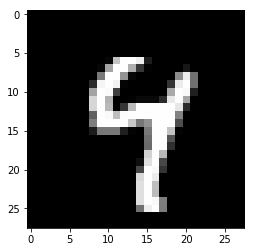

In [9]:
plt.gray()
plt.imshow(test_image)
plt.show()

In [10]:
labels[2]

4

In [54]:
def black_left_right(point1, point4, image):
    point2 = (point1[0], point4[1])
    point3 = (point4[0], point1[1])
    mid1 = (int((point1[0] + point3[0])/2), int((point1[1] + point3[1])/2))
    mid2 = (int((point2[0] + point4[0])/2), int((point2[1] + point4[1])/2))
    return abs(black(point1, mid1, point2, mid2, image) - black(mid1, point3, mid2, point4, image))

In [62]:
def black_top_bottom(point1, point4, image):
    point2 = (point1[0], point4[1])
    point3 = (point4[0], point1[1])
    mid1 = (int((point1[0] + point2[0])/2), int((point1[1] + point2[1])/2))
    mid2 = (int((point3[0] + point4[0])/2), int((point3[1] + point4[1])/2))
    return abs(black(point1, mid1, point3, mid2, image) - black(mid1, point2, mid2, point4, image))

In [55]:
def black(point1, point3, point2, point4, image):
    total_black = 0
    for i in range(point1[0], point3[0]):
        for j in range(point2[1], point1[1]):
            if image[i][j] > 0.2:
                total_black += 1
    return total_black

In [66]:
reduced_images = []
for i in range(65000):
    test_image = np.array(images[i]).reshape(28,28)
    temp_image = []
    for rectangle in rectangles:
        temp_image.append(black_left_right(rectangle[0], rectangle[1], test_image))
    for rectangle in rectangles:
        temp_image.append(black_top_bottom(rectangle[0], rectangle[1], test_image))
    reduced_images.append(temp_image)
reduced_images = np.array(reduced_images)
print(reduced_images.shape)

(65000, 200)


In [68]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(reduced_images[:55000], labels[:55000])
predicted_labels = classifier.predict(reduced_images[55000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

Accuracy of predictions:  80.55 %
